# As denúncias ao TCM-BA


Quanto tempo em média uma denúncia demora para ser julgada pelo Tribunal
de Contas dos Municípios?

Essa é a pergunta que queremos responder com esse notebook.

---

A coleta de dados foi feita utilizando scripts do repositório
[tcm-ba](https://github.com/DadosAbertosDeFeira/tcm-ba) em 17 de Julho de 2021.

In [17]:
import pandas as pd


df = pd.read_csv("processos-tcm-ba.csv")

In [19]:
df.sample(3)

,attachments,author,city,complement,crawled_at,description,document_date,entrance,entry_at,file_url,history,last_update_at,nature,notes,number_of_origin_document,place_of_origin,process_at,process_number,received,unit
12,NaN,Leonardo Rebouças Dourado Lima | CÁSSIO SAMPAI...,MORRO DO CHAPÉU,Consulta acerca da possibilidade de Dispensa d...,2021-07-11 09:17:27.269820,CONSULTA. CONTRATAÇÕES NO ÂMBITO DA ADMINISTRA...,31/12/1969,ETCM,07/07/2020,http://www.tcm.ba.gov.br/sistemas/textos/juris...,"[{'unity': 'GECPD', 'entry_date': '16/07/2020'...",16/07/2020,CON - Consulta,NaN,NaN,Prefeitura MORRO DO CHAPÉU,(Dados processados em 11/07/2021 04:18:17),10109e20,S,GECPD-Gerência de Controle de processos e Docu...
765,NaN,ANA CLEIA DOS SANTOS,IBIRATAIA,"Consulta referente ao art. 8º da LC 173/2020, ...",2021-07-11 09:17:27.266223,LEI COMPLEMENTAR Nº 173/2020. REFORMA ADMINIST...,31/12/1969,ETCM,15/01/2021,http://www.tcm.ba.gov.br/sistemas/textos/juris...,"[{'unity': 'GECPD', 'entry_date': '27/01/2021'...",27/01/2021,CON - Consulta,NaN,NaN,Prefeitura IBIRATAIA,(Dados processados em 11/07/2021 04:50:17),00702e21,S,GECPD-Gerência de Controle de processos e Docu...
803,NaN,SILVIO CORREIA,CANDEIAS,Consulta acerca de terceirização de serviços n...,2021-07-11 09:17:27.263509,ADMINISTRAÇÃO PÚBLICA. TERCEIRIZAÇÃO. ATIVIDAD...,31/12/1969,ETCM,22/02/2021,http://www.tcm.ba.gov.br/sistemas/textos/juris...,"[{'unity': 'GECPD', 'entry_date': '03/03/2021'...",03/03/2021,CON - Consulta,NaN,NaN,Câmara CANDEIAS,(Dados processados em 11/07/2021 04:51:52),02899e21,S,GECPD-Gerência de Controle de processos e Docu...


In [21]:
df.shape

(845, 20)

In [6]:
df["nature"].unique()

array(['CON     - Consulta', 'TOC     - Termo de Ocorrencia',
       'DEN     - Denuncia', nan, 'PCO     - Prestacao de Contas',
       'PCO.ECI - Prestação de Contas.Entidade Civil',
       'SOL     - Solicitacao Externa', 'CMU     - Comunicado Externo',
       'DEX     - Demandas Externas', 'PAL     - Pensao Alimenticia'],
      dtype=object)

In [7]:
df["entry_at"] = pd.to_datetime(df["entry_at"], format='%d/%m/%Y')
df["last_update_at"] = pd.to_datetime(df["last_update_at"], format='%d/%m/%Y')

In [8]:
df["interval_in_days"] = df["last_update_at"] - df["entry_at"]

In [9]:
df[["process_number", "description", "entry_at", "last_update_at", "interval_in_days", "nature", "city"]]

,process_number,description,entry_at,last_update_at,interval_in_days,nature,city
0,07121e21,CONSULTA. PANDEMIA. COVID-19. ADICIONAL DE INS...,2021-04-30,2021-06-02,33 days,CON - Consulta,CONDE
1,08846e20,POSSIBILIDADE DE IMPLEMENTAÇÃO DE REAJUSTAME...,2020-06-09,2020-06-15,6 days,CON - Consulta,CENTRAL
2,08792e20,CONSULTA. POSSIBILIDADE DE UTILIZAÇÃO DE RECUR...,2020-06-09,2020-06-23,14 days,CON - Consulta,MORRO DO CHAPÉU
3,08201e20,CONSULTA. ADMINISTRAÇÃO PÚBLICA. TERCEIRIZAÇÃO...,2020-05-28,2020-06-23,26 days,CON - Consulta,ENCRUZILHADA
4,09224e20,CONSULTA. SUBSÍDIO DOS VEREADORES. VEDAÇÃO DA ...,2020-06-18,2020-06-23,5 days,CON - Consulta,CENTRAL
...,...,...,...,...,...,...,...
840,04632e21,UTILIZAÇÃO DOS RECURSOS DECORRENTES DE DIFEREN...,2021-03-19,2021-04-13,25 days,CON - Consulta,OLIVEIRA DOS BREJINHOS
841,07451e21,CONSULTA. ALTERAÇÃO DO REGIME JURÍDICO. DIMINU...,2021-05-05,2021-05-25,20 days,CON - Consulta,SENHOR DO BONFIM
842,08641e21,CONSULTA. NOVA LEI DE LICITAÇÕES. UTILIZAÇÃO D...,2021-05-24,2021-06-02,9 days,CON - Consulta,FEIRA DA MATA
843,08602e21,CONSULTA. NOVA LEI DE LICITAÇÕES. UTILIZAÇÃO D...,2021-05-21,2021-06-02,12 days,CON - Consulta,BARRO ALTO


In [10]:
df.groupby('nature')["interval_in_days"].describe()


,count,mean,std,min,25%,50%,75%,max
nature,,,,,,,,
CMU - Comunicado Externo,6,65 days 04:00:00,89 days 14:52:58.733311017,10 days,21 days 06:00:00,28 days 12:00:00,52 days 06:00:00,245 days
CON - Consulta,689,30 days 21:04:26.473149492,94 days 07:22:44.953508644,2 days,13 days 00:00:00,18 days 00:00:00,28 days 00:00:00,2135 days
DEN - Denuncia,19,825 days 06:18:56.842105264,502 days 15:28:37.284335064,351 days,421 days 00:00:00,658 days 00:00:00,1037 days 12:00:00,2219 days
DEX - Demandas Externas,2,35 days 00:00:00,4 days 05:49:24.155367106,32 days,33 days 12:00:00,35 days 00:00:00,36 days 12:00:00,38 days
PAL - Pensao Alimenticia,1,7 days 00:00:00,NaT,7 days,7 days 00:00:00,7 days 00:00:00,7 days 00:00:00,7 days
PCO - Prestacao de Contas,3,341 days 00:00:00,127 days 02:33:00.411565120,217 days,276 days 00:00:00,335 days 00:00:00,403 days 00:00:00,471 days
PCO.ECI - Prestação de Contas.Entidade Civil,2,1352 days 12:00:00,911 days 11:03:19.378033328,708 days,1030 days 06:00:00,1352 days 12:00:00,1674 days 18:00:00,1997 days
SOL - Solicitacao Externa,49,29 days 00:29:23.265306122,53 days 03:55:23.157162192,7 days,13 days 00:00:00,19 days 00:00:00,27 days 00:00:00,382 days
TOC - Termo de Ocorrencia,53,850 days 22:38:29.433962272,499 days 09:43:32.662367544,173 days,451 days 00:00:00,790 days 00:00:00,1188 days 00:00:00,2115 days


In [11]:
df['nature'].fillna("", inplace=True)
denuncias = df[df['nature'].str.contains("Denuncia")]
denuncias

,attachments,author,city,complement,crawled_at,description,document_date,entrance,entry_at,file_url,...,last_update_at,nature,notes,number_of_origin_document,place_of_origin,process_at,process_number,received,unit,interval_in_days
17,NaN,ALDO DE MATTOS SABINO JUNIOR-ADVOGADO,IBOTIRAMA,"VALDOMIRO ABRAÃO PERSCH-DENUNCIANTE, ATRAVÉS D...",2021-07-11 09:17:27.320332,Denúncia. Contratação de escritório de advocac...,22/12/2011,RM-017306761-S/DATA,2011-12-29,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2016-08-24,DEN - Denuncia,NaN,NaN,Prefeitura IBOTIRAMA,(Dados processados em 11/07/2021 04:18:37),16660-11,S,DDI-Divisão de Documentação e Informação,1700 days
20,NaN,araci dos santos reis-presidente,DIAS DÁVILA,denúncia de improbidade adminstrativa em desfa...,2021-07-11 09:17:27.320210,Denúncia. Aposição de cognome de autoridade pú...,06/10/2011,em mãos,2011-10-17,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2014-07-28,DEN - Denuncia,NaN,NaN,Câmara DIAS DÁVILA,(Dados processados em 11/07/2021 04:18:48),13302-11,S,DDI-Divisão de Documentação e Informação,1015 days
22,01 VOLUME,AGNELO DA MERCÊS CORDEIRO - INSPETRO REGIONAL,CAETITÉ,SOLICITAÇÃO DE PARECER ACERCA DE SUBSTITUIÇÃO ...,2021-07-11 09:17:27.320026,Consulta Interna. Consulta 7ª IRCE. Privilégio...,22/08/2013,EM MÃOS,2013-08-22,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2014-10-16,DEN - Denuncia,NaN,014/2013,Município CAETITÉ,(Dados processados em 11/07/2021 04:18:51),49188-13,S,DDI-Divisão de Documentação e Informação,420 days
24,DOCUMENTAÇÃO DIVERSA,BENEDITO CARLOS DOS REIS E OUTROS VEREADORES,RIBEIRA DO AMPARO,"DENÚNCIA CONTRA TETIANA BRITO, PREFEITA, POR N...",2021-07-11 09:17:27.319786,Denúncia. Defesa da Gestora. Representação pro...,18/04/2013,EM MÃO,2013-05-16,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2014-07-09,DEN - Denuncia,ENTREGUE EM 13/05/13,S/N,Câmara RIBEIRA DO AMPARO,(Dados processados em 11/07/2021 04:18:55),55093-13,S,DDI-Divisão de Documentação e Informação,419 days
26,03 dvd,carlos vinicius de melo gomes calasans - vereador,RIBEIRA DO POMBAL,apresenta denúncia contra o prefeito sr. josé ...,2021-07-11 09:17:27.319846,Denúncia. Ex-Prefeito de Ribeira do Pombal. Ex...,11/08/2011,em mãos,2011-09-09,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2015-03-05,DEN - Denuncia,NaN,NaN,Câmara RIBEIRA DO POMBAL,(Dados processados em 11/07/2021 04:18:58),12001-11,S,DDI-Divisão de Documentação e Informação,1273 days
30,NaN,carlos miguel b. g. silva - rep. trivale admin...,RIACHÃO DO JACUÍPE,representação com pedido de adoção de urgente ...,2021-07-11 09:17:27.319519,Pedido de Reconsideração. Denúncia. Prefeitura...,18/03/2013,guia tce nº1978/13,2013-03-19,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2014-05-15,DEN - Denuncia,NaN,NaN,Prefeitura RIACHÃO DO JACUÍPE,(Dados processados em 11/07/2021 04:19:08),03363-13,S,DDI-Divisão de Documentação e Informação,422 days
37,NaN,LUCAS DE JESUS OLIVEIRA - PRESIDENTE CONSELHO ...,ITAMBÉ,ENCAMINHA REPRESENTAÇÃO CONTA SR. IVAN FERNAND...,2021-07-11 09:17:27.319087,Denúncia. Irregularidades na aplicação dos rec...,19/05/2014,MALOTE,2014-05-22,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2015-05-08,DEN - Denuncia,NaN,S/N,Prefeitura ITAMBÉ,(Dados processados em 11/07/2021 04:19:35),41865-14,S,DDI-Divisão de Documentação e Informação,351 days
40,NaN,waldir pires ribeiro de barros - servidor público,IGAPORÃ,apresenta denúncia de pratica de nepotismo con...,2021-07-11 09:17:27.318902,Denúncia. Nepotismo. Violação à Súmula Vincula...,05/10/2013,jg 005599643,2013-11-05,http://www.tcm.ba.gov.br/sistemas/textos/juris...,...,2015-08-25,DEN - Denuncia,NaN,NaN,Prefeitura IGAPORÃ,(Dados processados em 11/07/2021 04:19:38),16843-13,S,DDI-Divisão de Documentação e Informação,658 days
41,NaN,ailton figueiredo souza junior- vereador,NAZARÉ,apresenta denuncia contra o prefeito milton ra...,2021-07-11 09:17:27.318842,Denúncia. Licitação. Contratação de parentes d...,15/05/2014,em mãos,20

In [12]:
df["interval_in_days"] = df["interval_in_days"].apply(lambda x: x.days)

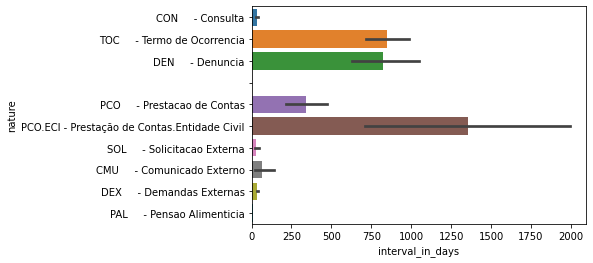

In [13]:
import seaborn as sns

 
ax = sns.barplot(y="nature", x="interval_in_days", data=df, orient="h")

[Text(0, 0, 'CON     - Consulta'),
 Text(1, 0, 'TOC     - Termo de Ocorrencia'),
 Text(2, 0, 'DEN     - Denuncia'),
 Text(3, 0, ''),
 Text(4, 0, 'PCO     - Prestacao de Contas'),
 Text(5, 0, 'PCO.ECI - Prestação de Contas.Entidade Civil'),
 Text(6, 0, 'SOL     - Solicitacao Externa'),
 Text(7, 0, 'CMU     - Comunicado Externo'),
 Text(8, 0, 'DEX     - Demandas Externas'),
 Text(9, 0, 'PAL     - Pensao Alimenticia')]

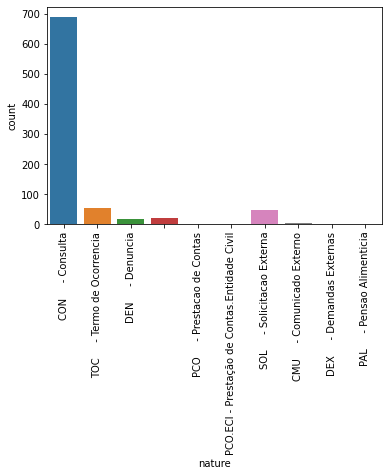

In [14]:
ax = sns.countplot(x="nature", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'IBOTIRAMA'),
 Text(1, 0, 'DIAS DÁVILA'),
 Text(2, 0, 'CAETITÉ'),
 Text(3, 0, 'RIBEIRA DO AMPARO'),
 Text(4, 0, 'RIBEIRA DO POMBAL'),
 Text(5, 0, 'RIACHÃO DO JACUÍPE'),
 Text(6, 0, 'ITAMBÉ'),
 Text(7, 0, 'IGAPORÃ'),
 Text(8, 0, 'NAZARÉ'),
 Text(9, 0, 'ITAETÊ'),
 Text(10, 0, 'SÃO FRANCISCO DO CONDE'),
 Text(11, 0, 'UTINGA'),
 Text(12, 0, 'SANTO AMARO'),
 Text(13, 0, 'BARREIRAS'),
 Text(14, 0, 'MORRO DO CHAPÉU'),
 Text(15, 0, 'ITAPARICA')]

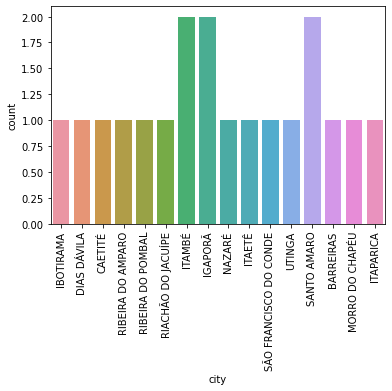

In [15]:
ax = sns.countplot(x="city", data=denuncias)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Prefeitura IBOTIRAMA'),
 Text(1, 0, 'Câmara DIAS DÁVILA'),
 Text(2, 0, 'Município CAETITÉ'),
 Text(3, 0, 'Câmara RIBEIRA DO AMPARO'),
 Text(4, 0, 'Câmara RIBEIRA DO POMBAL'),
 Text(5, 0, 'Prefeitura RIACHÃO DO JACUÍPE'),
 Text(6, 0, 'Prefeitura ITAMBÉ'),
 Text(7, 0, 'Prefeitura IGAPORÃ'),
 Text(8, 0, 'Câmara NAZARÉ'),
 Text(9, 0, 'Câmara ITAETÊ'),
 Text(10, 0, 'Prefeitura SÃO FRANCISCO DO CONDE'),
 Text(11, 0, 'Prefeitura UTINGA'),
 Text(12, 0, 'Câmara SANTO AMARO'),
 Text(13, 0, 'Prefeitura BARREIRAS'),
 Text(14, 0, 'Prefeitura MORRO DO CHAPÉU'),
 Text(15, 0, 'Prefeitura ITAPARICA')]

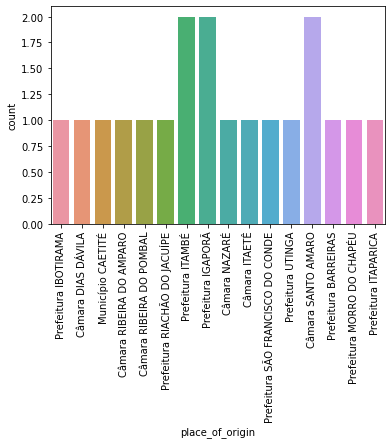

In [16]:
ax = sns.countplot(x="place_of_origin", data=denuncias)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)